# **House Price Analysis and Prediction**

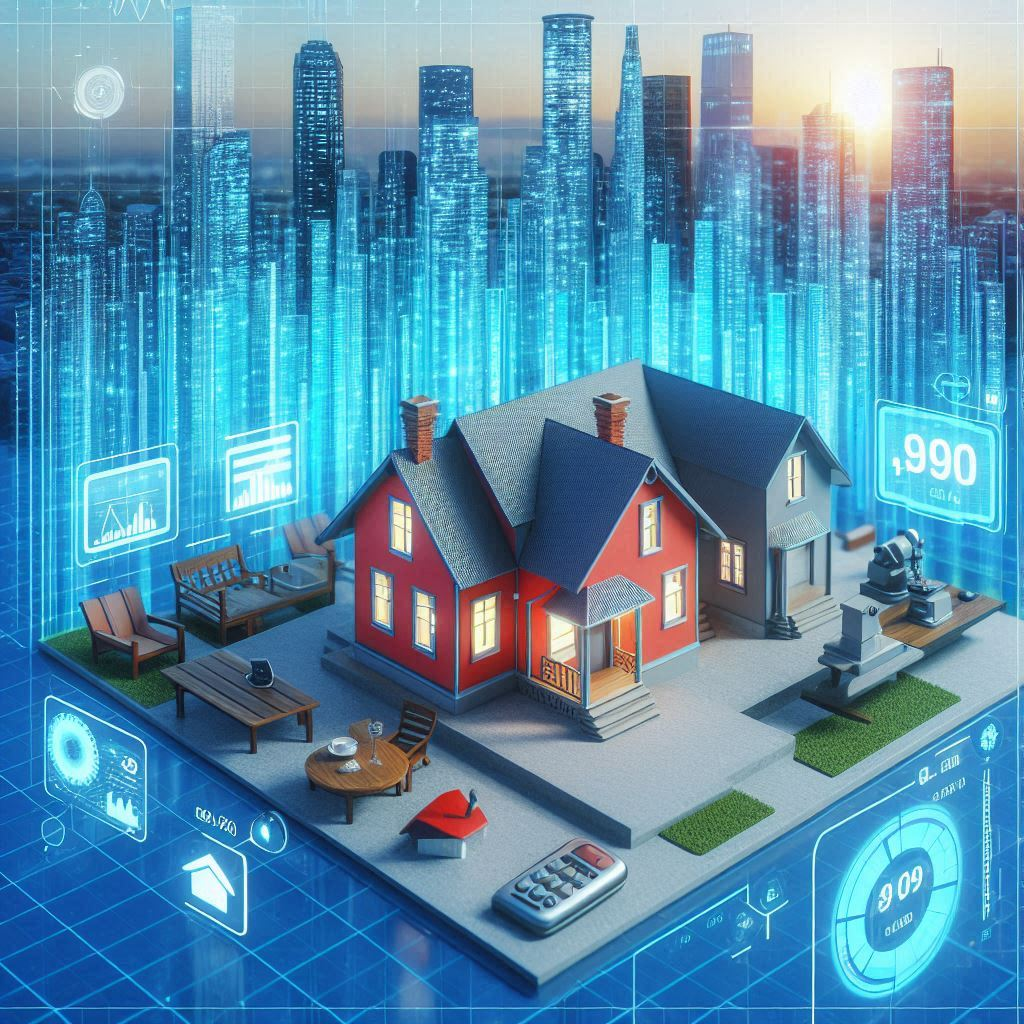

## **Table of Contents**

1. Introduction
2. Dataset Description
3. Data Cleaning and Exploration
4. Feature Engineering
5. Outliers Analysis
6. Predictive Modeling
7. Future price Prediction
8. Conclusion

## **1. Introduction**

#### Objectives

- Analyze housing market data to identify key factors influencing house prices.
- Manage data inconsistencies and outliers to ensure data reliability.
- Build a predictive model to accurately forecast house prices.
- Provide insights to help stakeholders make informed decisions about market trends and property valuations.

## **2. Dataset Description**
This dataset contains information about properties, including their attributes and location details.

#### Dataset Attributes
- **property_id:** Unique identifier for each property.
- **location_id:** Identifier for property location.
- **page_url**: URL link to property details.
- **property_type**: Type of property (e.g., house, apartment).
- **price**: Price of the property.
- **location**: Specific location of the property. 
- **city**: City where the property is located.
- **province_name**: Name of the province where the property is located.
- **latitude**: Geographic latitude coordinate of the property.
- **longitude**: Geographic longitude coordinate of the property.
- **baths**: Number of bathrooms in the property.
- **area**: Total area size of the property.
- **purpose**: Purpose of the property (e.g., sale, rent).
- **bedrooms**: Number of bedrooms in the property.
- **date_added**: Date when the property listing was added.
- **agency**: Agency handling the property.
- **agent**: Agent responsible for the property.
- **Area Type:** Type of area where the property is located.
- **Area Size:** Size of the area where the property is located.
- **Area Category:** Category of the area where the property is located.

## **3. Data Cleaning and Exploration**

In [ ]:
#imoort libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

#### **Basic Info about Dataset**

In [3]:
# Set the display option
pd.options.display.max_columns = None

# check the 5 rows of dataset
df = pd.read_csv('zameen-updated.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [4]:
# Check no of columns and rows
df.shape

(168446, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [6]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


#### **Identify Missing values**

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64


In [8]:
# Check percentage of missing values
missing_values = df.isnull().sum()/ len(df) *100
print(missing_values)

property_id       0.000000
location_id       0.000000
page_url          0.000000
property_type     0.000000
price             0.000000
location          0.000000
city              0.000000
province_name     0.000000
latitude          0.000000
longitude         0.000000
baths             0.000000
area              0.000000
purpose           0.000000
bedrooms          0.000000
date_added        0.000000
agency           26.163281
agent            26.163874
Area Type         0.000000
Area Size         0.000000
Area Category     0.000000
dtype: float64


#### **Handle the missing values**

In [10]:
# Fill missing values in 'agent' and 'agency' columns with 'Unknown'
df['agent'].fillna('Unknown', inplace=True)
df['agency'].fillna('Unknown', inplace=True)

#### **Checking Duplicates**

In [11]:
# Checking for duplicate values
duplicates = df.duplicated().sum()
print("Number of Duplicates:" , duplicates)

Number of Duplicates: 0


In [12]:
# Check data types
print(df.dtypes)

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object


#### **Handling Inconsistencies**

In [13]:
# Strip leading/trailing spaces and convert to lowercase for consistency
categorical_columns = ['page_url', 'property_type', 'location', 'city', 'province_name', 'purpose', 'agency', 'agent', 'Area Type', 'Area Category']

for col in categorical_columns:
    df[col] = df[col].str.strip().str.lower()


In [14]:
# Validate 'price' - it should be positive
df = df[df['price'] > 0]

# Validate 'latitude' and 'longitude' - ensure they are within valid ranges
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]

In [15]:
# Validate 'baths' and 'bedrooms' - they should be non-negative integers
df = df[df['baths'] >= 0]
df = df[df['bedrooms'] >= 0]

#### **Detecting outliers Visually**

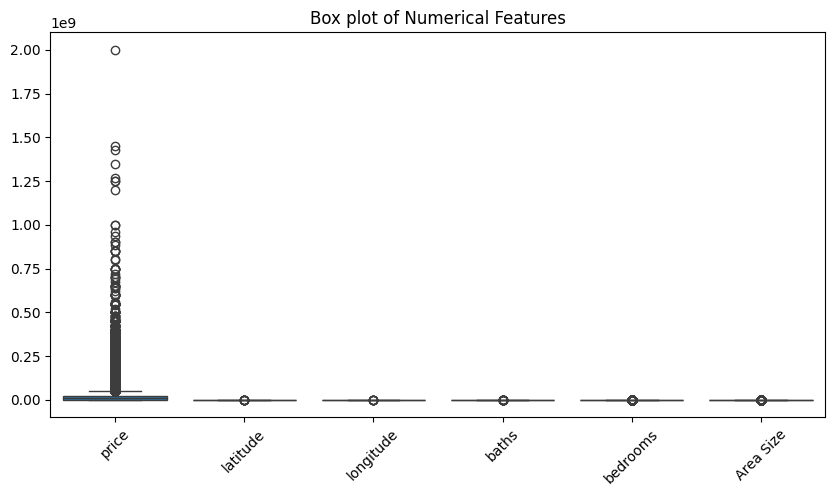

In [16]:
# Numerical columns for outlier detection
numerical_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Area Size']

# Box plot visualization to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_columns])
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

#### **Detecting Outliers using IQR Method**

In [15]:
# Outlier detection using IQR (Interquartile Range)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Count outliers for each numerical column
outliers_count = outliers.sum()
print("Number of Outliers:")
print(outliers_count)

Number of Outliers:
price        13547
latitude         9
longitude        6
baths           22
bedrooms      3319
Area Size     3326
dtype: int64


#### **Handling Outliers**

In [17]:
from scipy.stats.mstats import winsorize

# Winsorize numerical columns
df['price'] = winsorize(df['price'], limits=[0.01, 0.01])
df['latitude'] = winsorize(df['latitude'], limits=[0.05, 0.05])
df['longitude'] = winsorize(df['longitude'], limits=[0.05, 0.05])
df['baths'] = winsorize(df['baths'], limits=[0.05, 0.05])
df['bedrooms'] = winsorize(df['bedrooms'], limits=[0.05, 0.05])
df['Area Size'] = winsorize(df['Area Size'], limits=[0.05, 0.05])

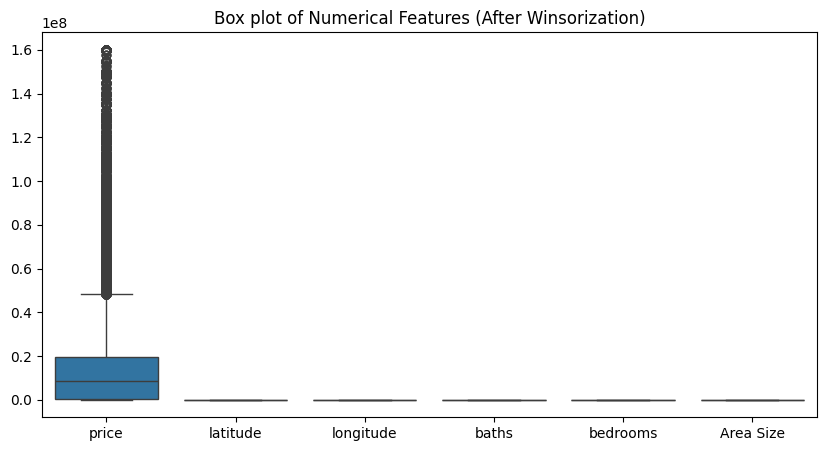

In [19]:
# Box plot of numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_columns])
plt.title('Box plot of Numerical Features (After Winsorization)')
plt.show()

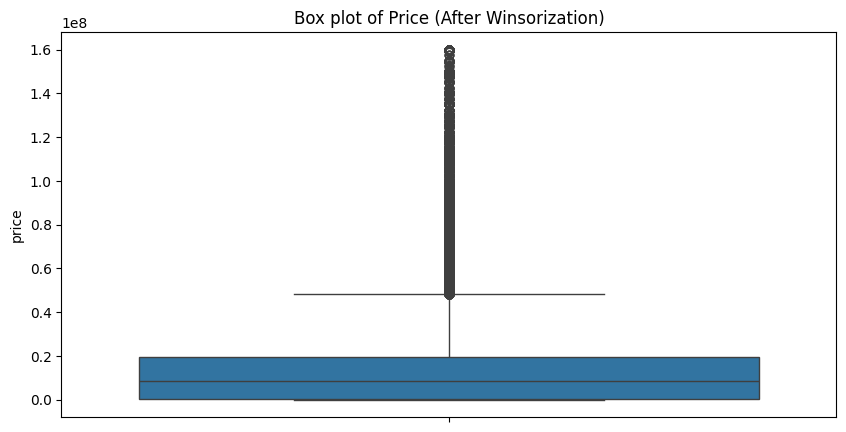

In [23]:
from scipy.stats.mstats import winsorize

# Visualize the 'price' column after winsorization
plt.figure(figsize=(10, 5))
sns.boxplot(df['price'])
plt.title('Box plot of Price (After Winsorization)')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define the upper and lower bounds for outlier detection
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Calculate the mean of 'price'
mean_price = df['price'].mean()

# Replace outliers with the mean
df.loc[df['price'] > upper_bound_price, 'price'] = mean_price
df.loc[df['price'] < lower_bound_price, 'price'] = mean_price

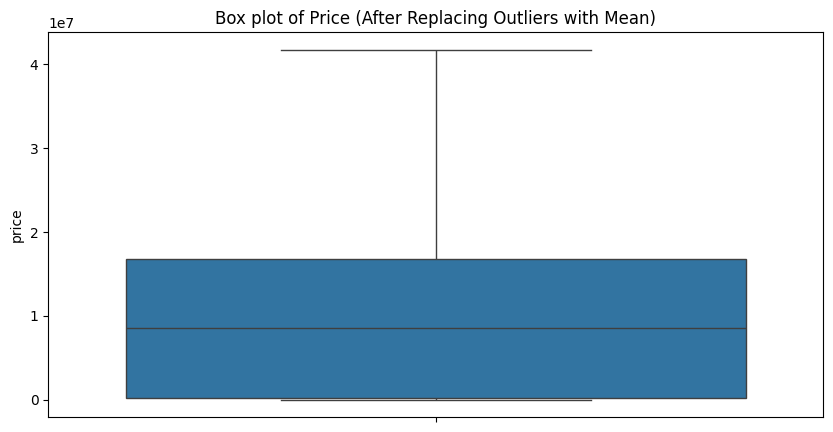

In [26]:
# Visualize the 'price' column after replacing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(df['price'])
plt.title('Box plot of Price (After Replacing Outliers with Mean)')
plt.show()

#### **Inspecting Outliers**

In [32]:
# Create a mask for outliers using NumPy operations
outliers_post = (df[numerical_columns] < lower_bound_price) | (df[numerical_columns] > upper_bound_price)

# Count outliers for each numerical column
outliers_count_post = outliers_post.sum()

# Print the number of outliers after handling
print("Number of Outliers After Handling:")
print(outliers_count_post)

Number of Outliers After Handling:
price        0
latitude     0
longitude    0
baths        0
bedrooms     0
Area Size    0
dtype: int64


#### **Analysis of House Price Distribution and Feature Relationships**

#### **Pair Plot**

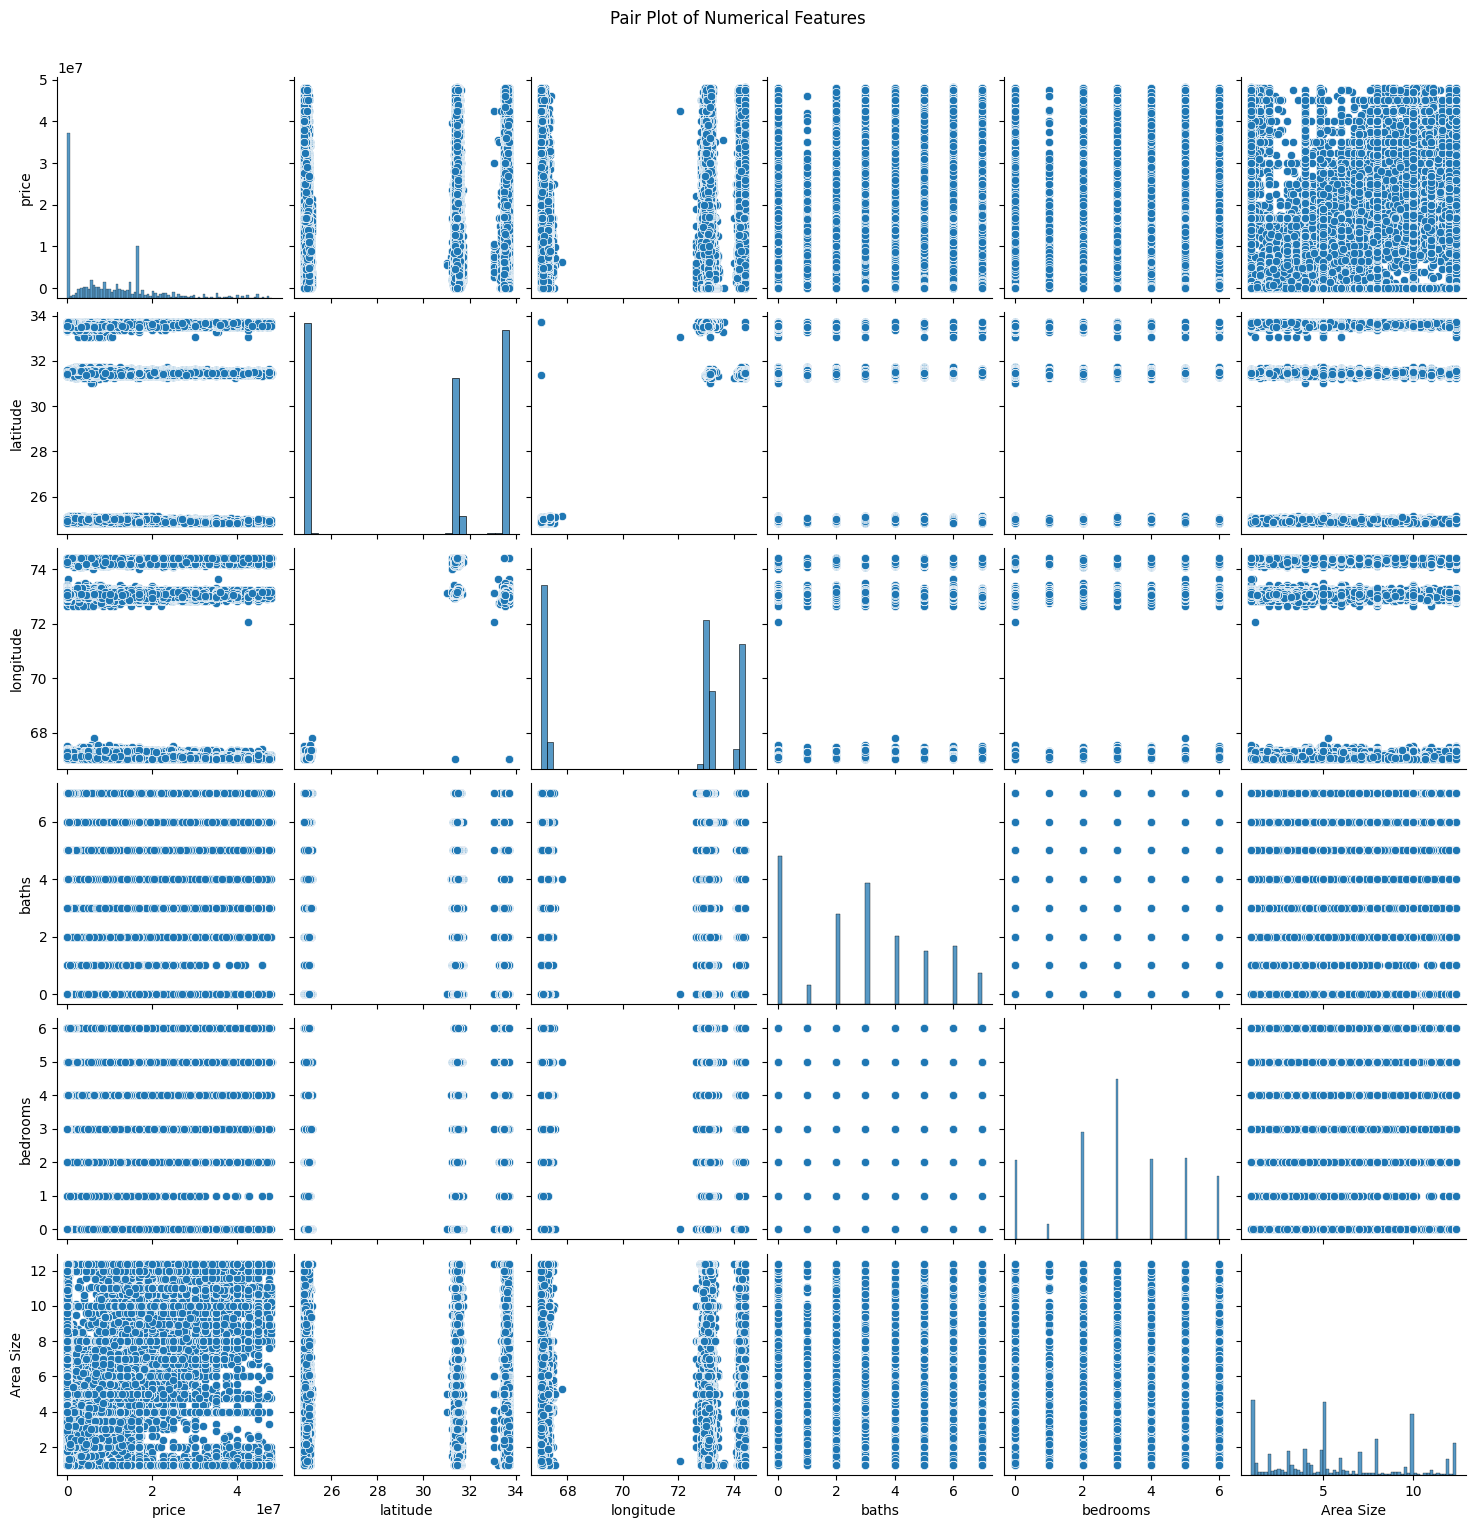

In [22]:
# Pair plot of numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


#### **Correlation Heatmap**

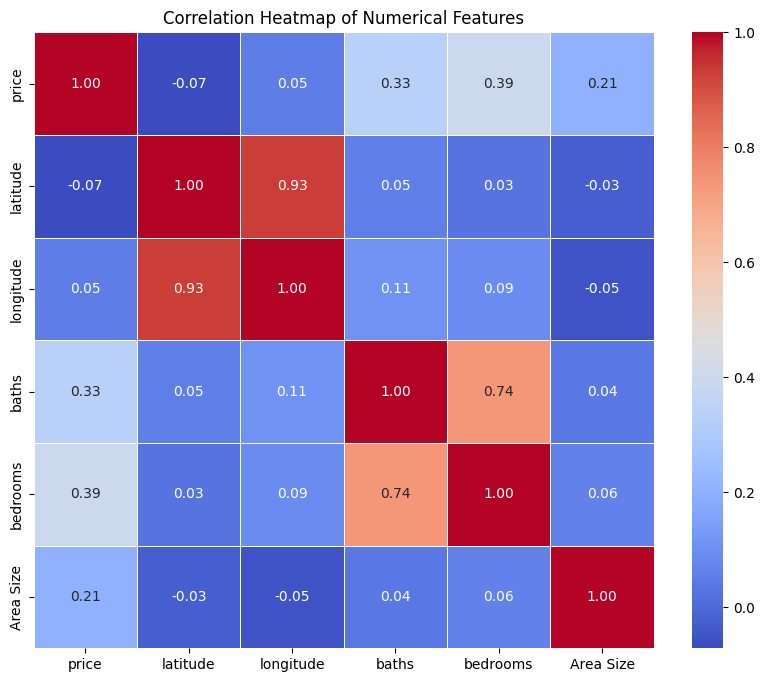

In [34]:
# Calculate correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#### **Voilin Plot**

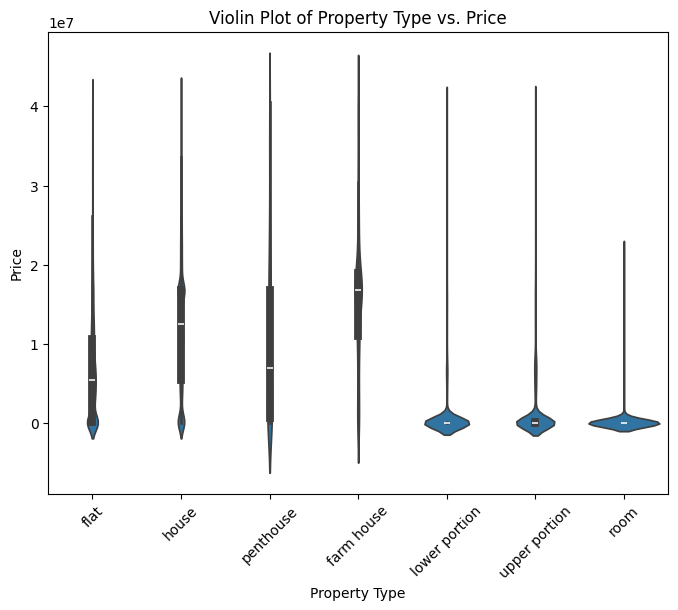

In [33]:
# Violin plot of Property Type vs. Price
plt.figure(figsize=(8, 6))
sns.violinplot(x='property_type', y='price', data=df)
plt.title('Violin Plot of Property Type vs. Price')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


#### **Box PLot**

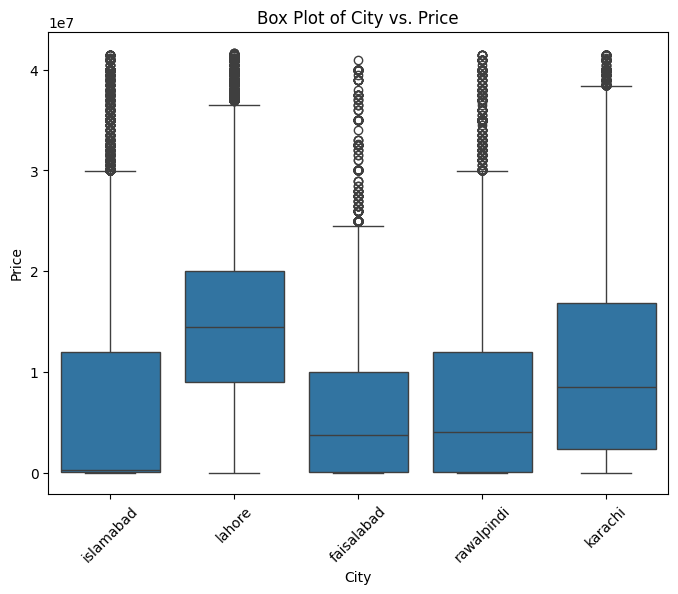

In [35]:
# Box plot: City vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='city', y='price', data=df)
plt.title('Box Plot of City vs. Price')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


#### **Histogram**

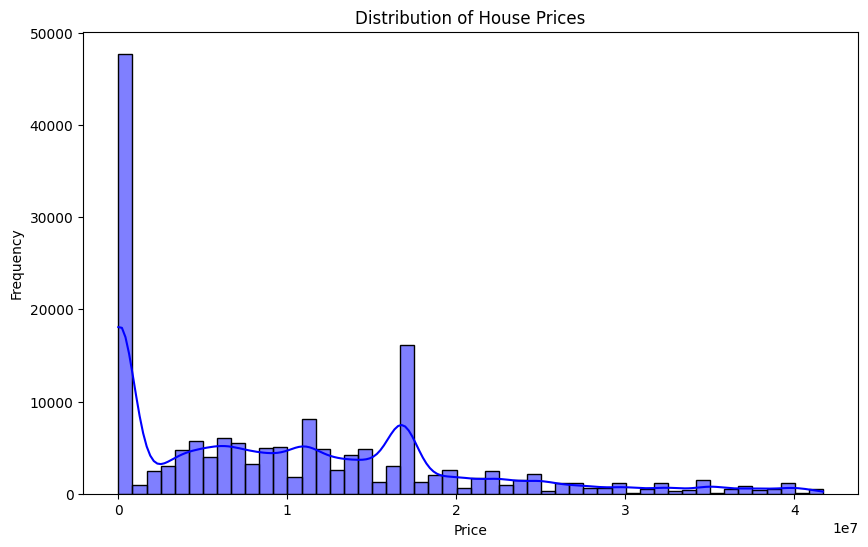

In [36]:
# Histogram with KDE of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


## **4.Feature Engineering**

In [37]:
import datetime 

# Extract the year from 'date_added' and calculate the age
current_year = datetime.datetime.now().year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['house_age'] = current_year - df['date_added'].dt.year

In [ ]:
# Handle any possible errors due to 'date_added' conversion by filling NaN with median age
df['house_age'].fillna(df['house_age'].median(), inplace=True)

In [ ]:
# Create a new feature: number of bathrooms per bedroom
df['baths_per_bedroom'] = df['baths'] / df['bedrooms']

# Handle any possible errors due to division by zero or NaN values
df['baths_per_bedroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['baths_per_bedroom'].fillna(df['baths_per_bedroom'].median(), inplace=True)


In [40]:
# Display the new features
print(df[['house_age', 'baths_per_bedroom']].head())


   house_age  baths_per_bedroom
0          5                1.0
1          5                1.0
2          5                1.2
3          5                1.0
4          5                1.0


In [41]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,house_age,baths_per_bedroom
0,237062,3325,https://www.zameen.com/property/g_10_g_10_2_gr...,flat,1.000000e+07,g-10,islamabad,islamabad capital,33.679890,73.012640,2,4 Marla,for sale,2,2019-02-04,unknown,unknown,marla,4.0,0-5 marla,5,1.0
1,346905,3236,https://www.zameen.com/property/e_11_2_service...,flat,6.900000e+06,e-11,islamabad,islamabad capital,33.698137,72.971492,3,5.6 Marla,for sale,3,2019-05-04,unknown,unknown,marla,5.6,5-10 marla,5,1.0
2,386513,764,https://www.zameen.com/property/islamabad_g_15...,house,1.650000e+07,g-15,islamabad,islamabad capital,33.631486,72.926559,6,8 Marla,for sale,5,2019-07-17,unknown,unknown,marla,8.0,5-10 marla,5,1.2
3,656161,340,https://www.zameen.com/property/islamabad_bani...,house,1.095327e+07,bani gala,islamabad,islamabad capital,33.698137,73.151199,4,2 Kanal,for sale,4,2019-04-05,unknown,unknown,kanal,2.0,1-5 kanal,5,1.0
4,841645,3226,https://www.zameen.com/property/dha_valley_dha...,house,7.000000e+06,dha defence,islamabad,islamabad capital,33.492591,73.301339,3,8 Marla,for sale,3,2019-07-10,easy property,muhammad junaid ceo muhammad shahid director,marla,8.0,5-10 marla,5,1.0


In [42]:
# Save the dataset with new features
df.to_csv('cleaned_dataset.csv', index=False)

#### **Categorical Feature Encoding for Modeling**

In [ ]:
# List of categorical columns to encode
categorical_columns = [
    'property_type', 'location', 'city', 
    'province_name', 'purpose', 'agency', 
    'agent', 'Area Type', 'Area Category'
]

# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


# **5. Outlier Analysis**

In [44]:
# Calculate Z-scores for 'price' to identify outliers
from scipy.stats import zscore

df['price_zscore'] = zscore(df['price'])

# Define a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
outliers_high = df[df['price_zscore'] > 3]
outliers_low = df[df['price_zscore'] < -3]

# Display the number of outliers
print("Number of High Price Outliers:", len(outliers_high))
print("Number of Low Price Outliers:", len(outliers_low))


Number of High Price Outliers: 1716
Number of Low Price Outliers: 0


In [45]:
# Print information about high price outliers
print("High Price Outliers:")
print(outliers_high[['property_id', 'price', 'location', 'area', 'bedrooms', 'baths', 'house_age']])


High Price Outliers:
        property_id       price     location       area  bedrooms  baths  \
9           1418706  40000000.0         f-11    1 Kanal         5      5   
48           482892  40000000.0  multan road    1 Kanal         5      5   
56           983075  40000000.0   izmir town  1.6 Kanal         6      0   
64          1997947  39500000.0      gulberg   10 Marla         6      6   
66          2146098  40000000.0  chaman park   11 Marla         6      3   
...             ...         ...          ...        ...       ...    ...   
168360     17355128  39500000.0  dha defence    1 Kanal         6      7   
168381     17356096  40000000.0  dha defence  1.2 Kanal         5      6   
168406     17356560  40000000.0       askari   17 Marla         5      5   
168407     17356585  41500000.0  dha defence    1 Kanal         5      5   
168415     17357038  41500000.0        nfc 1    1 Kanal         5      6   

        house_age  
9               5  
48              6  
56    

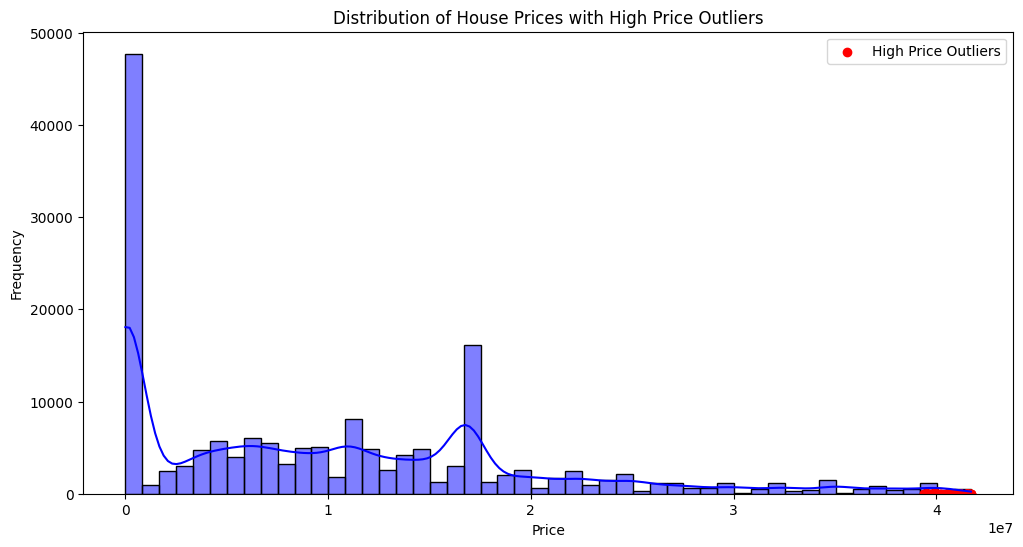

In [46]:
# Visualize the distribution of house prices with outliers highlighted
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=50, color='blue')
plt.title('Distribution of House Prices with High Price Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Highlight high price outliers in the plot
plt.scatter(outliers_high['price'], [0] * len(outliers_high), color='red', label='High Price Outliers')
plt.legend()
plt.show()

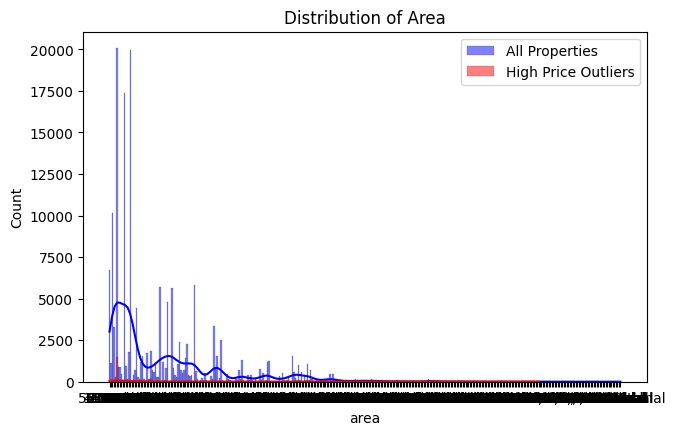

In [37]:
# Visualize distributions of key features for the entire dataset and high price outliers
plt.figure(figsize=(16, 10))

# Distribution of 'area'
plt.subplot(2, 2, 1)
sns.histplot(df['area'], kde=True, bins=30, color='blue', label='All Properties')
sns.histplot(outliers_high['area'], kde=True, bins=10, color='red', label='High Price Outliers')
plt.title('Distribution of Area')
plt.legend()

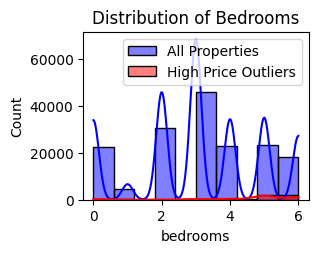

In [38]:
# Distribution of 'bedrooms'
plt.subplot(2, 2, 2)
sns.histplot(df['bedrooms'], kde=True, bins=10, color='blue', label='All Properties')
sns.histplot(outliers_high['bedrooms'], kde=True, bins=5, color='red', label='High Price Outliers')
plt.title('Distribution of Bedrooms')
plt.legend()

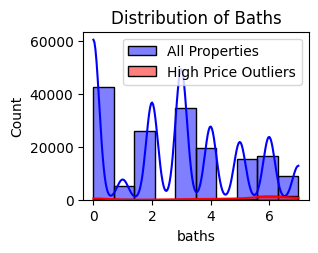

In [39]:
# Distribution of 'baths'
plt.subplot(2, 2, 3)
sns.histplot(df['baths'], kde=True, bins=10, color='blue', label='All Properties')
sns.histplot(outliers_high['baths'], kde=True, bins=5, color='red', label='High Price Outliers')
plt.title('Distribution of Baths')
plt.legend()

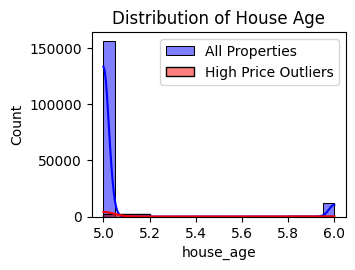

In [40]:
# Distribution of 'house_age'
plt.subplot(2, 2, 4)
sns.histplot(df['house_age'], kde=True, bins=20, color='blue', label='All Properties')
sns.histplot(outliers_high['house_age'], kde=True, bins=5, color='red', label='High Price Outliers')
plt.title('Distribution of House Age')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
# Compare summary statistics for key features
summary_stats_all = df[['area', 'bedrooms', 'baths', 'house_age']].describe()
summary_stats_outliers = outliers_high[['area', 'bedrooms', 'baths', 'house_age']].describe()
print("Summary Statistics for All Properties:")
print(summary_stats_all)
print("\nSummary Statistics for High Price Outliers:")
print(summary_stats_outliers)

Summary Statistics for All Properties:
            bedrooms          baths      house_age
count  168443.000000  168443.000000  168443.000000
mean        3.100224       2.835707       5.072731
std         1.777040       2.177108       0.259695
min         0.000000       0.000000       5.000000
25%         2.000000       0.000000       5.000000
50%         3.000000       3.000000       5.000000
75%         4.000000       4.000000       5.000000
max         6.000000       7.000000       6.000000

Summary Statistics for High Price Outliers:
          bedrooms        baths    house_age
count  1716.000000  1716.000000  1716.000000
mean      4.397436     4.315851     5.049534
std       1.691162     2.428068     0.217043
min       0.000000     0.000000     5.000000
25%       4.000000     3.000000     5.000000
50%       5.000000     5.000000     5.000000
75%       6.000000     6.000000     5.000000
max       6.000000     7.000000     6.000000


# **6. Predictive Modeling**

In [56]:
# Function to convert area measurements to square feet
def convert_area(area):
    if isinstance(area, str):
        area = area.replace(',', '')  # Remove commas from the string
        if 'Marla' in area:
            value = float(area.split()[0])
            return value * 272.25
        elif 'Kanal' in area:
            value = float(area.split()[0])
            return value * 20 * 272.25
        elif 'Square Feet' in area:
            value = float(area.split()[0])
            return value
    return area  

# Apply the conversion function to the 'area' column
df['area'] = df['area'].apply(convert_area)


#### **Linear Regression**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
features = ['area', 'bedrooms', 'baths', 'house_age', 'latitude', 'longitude']
target = 'price'

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)

#### **Evaluate the Model Performance**

In [59]:
# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Linear Regression Performance:
Mean Absolute Error: 6411662.5088074645
Mean Squared Error: 71347429312049.25
R-squared: 0.2395611909711216


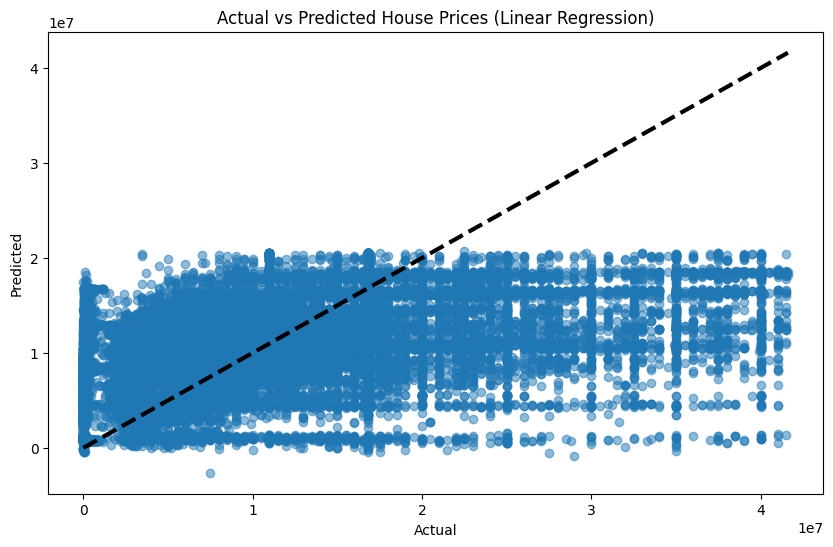

In [60]:
# Plot predictions vs actual prices for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.show()


#### **Random forest** 

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [62]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

#### **Evaluate the Model Performance**

In [63]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Random Forest Performance:
Mean Absolute Error: 3814927.587887695
Mean Squared Error: 41168477731548.66
R-squared: 0.5612160315014497


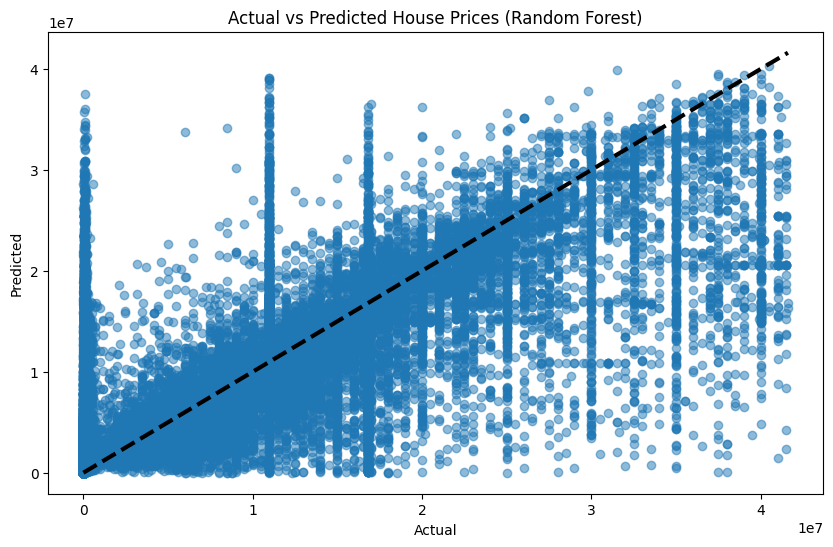

In [64]:
# Plot predictions vs actual prices for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.show()


#### **Gradient Boosting**

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [66]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)


#### **Evaluate the Model Performance**

In [68]:
# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Performance:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Performance:
Mean Absolute Error: 5135581.0343836965
Mean Squared Error: 51133995148997.57
R-squared: 0.4550010456308714


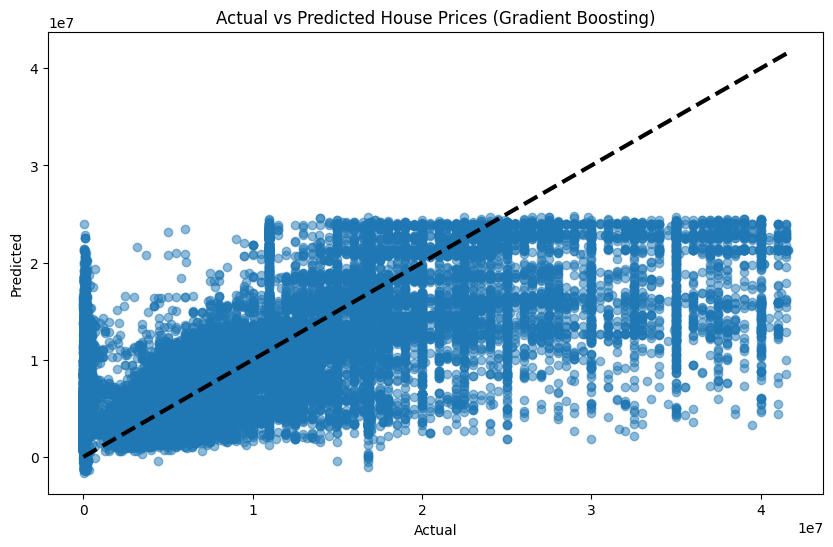

In [69]:
# Plot predictions vs actual prices for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Gradient Boosting)')
plt.show()


# **7.Future price Prediction**

In [70]:
# Define the hypothetical scenarios (adjust as per your data structure)
hypothetical_data = {
    'area': [2500, 1500, 2000],  # in square feet
    'bedrooms': [4, 2, 3],
    'baths': [3, 1, 2],
    'house_age': [10, 5, 8],
    'latitude': [31.5204, 33.6844, 31.4278],
    'longitude': [74.3587, 73.0479, 73.0867]
}

# Create a DataFrame with hypothetical scenarios
df_hypothetical = pd.DataFrame(hypothetical_data)

# Use trained models to predict prices for hypothetical scenarios
predicted_prices_lr = lr_model.predict(df_hypothetical)
predicted_prices_rf = rf_model.predict(df_hypothetical)
predicted_prices_gb = gb_model.predict(df_hypothetical)


In [71]:
# Print the predicted prices for each model
print("Predicted Prices for Hypothetical Scenarios (Linear Regression):")
print(predicted_prices_lr)

print("\nPredicted Prices for Hypothetical Scenarios (Random Forest):")
print(predicted_prices_rf)

# Print the predicted prices for the hypothetical scenarios
print("\nPredicted Prices for Hypothetical Scenarios (Gradient Boosting):")
print(predicted_prices_gb)


Predicted Prices for Hypothetical Scenarios (Linear Regression):
[10081272.47202951  4385032.10518862  7591245.030196  ]

Predicted Prices for Hypothetical Scenarios (Random Forest):
[27841729.24805562  1565870.76190476 13569395.25258376]

Predicted Prices for Hypothetical Scenarios (Gradient Boosting):
[22078417.57633539  3412520.94760612  8819282.0253196 ]
